<a href="https://colab.research.google.com/github/Fhayes3/ds-projects/blob/main/Fred_Hayes_MT_Project_LearnerNotebook_FullCode_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

#For display tables
from tabulate import tabulate
!pip install side-by-side

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the dataset

In [ ]:
#Code to load the datasets
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv") 

## Data Overview

- Observations
- Sanity checks

### Copy and check the first few rows of both data sets

**Copying the uploaded data sets.**

In [ ]:
#copying the datasets
dtrain = df.copy()
dtest = df_test.copy()

**Below are the first five rows of the Train and Test data sets.**

In [ ]:
print("Train Data Head:\n",)
dtrain.head()

Train Data Head:



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
print("Test Data Head:\n",)
dtest.head()

Test Data Head:



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


**Below are the last five rows of the Train and Test data sets.**

In [ ]:
print("Train Data Tail:\n",)
dtrain.tail()

Train Data Tail:



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


In [ ]:
print("Test Data Tail:\n",)
dtest.tail()

Test Data Tail:



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120,1.635,1.251,4.036,3.291,-2.932,-1.329,1.754,-2.985,1.249,-6.878,3.715,-2.512,-1.395,-2.554,-2.197,4.772,2.403,3.792,0.487,-2.028,1.778,3.668,11.375,-1.977,2.252,-7.319,1.907,-3.734,-0.012,2.120,9.979,0.063,0.217,3.036,2.109,-0.557,1.939,0.513,-2.694,0
4996,-5.172,1.172,1.579,1.220,2.530,-0.669,-2.618,-2.001,0.634,-0.579,-3.671,0.460,3.321,-1.075,-7.113,-4.356,-0.001,3.698,-0.846,-0.222,-3.645,0.736,0.926,3.278,-2.277,4.458,-4.543,-1.348,-1.779,0.352,-0.214,4.424,2.604,-2.152,0.917,2.157,0.467,0.470,2.197,-2.377,0
4997,-1.114,-0.404,-1.765,-5.879,3.572,3.711,-2.483,-0.308,-0.922,-2.999,-0.112,-1.977,-1.623,-0.945,-2.735,-0.813,0.610,8.149,-9.199,-3.872,-0.296,1.468,2.884,2.792,-1.136,1.198,-4.342,-2.869,4.124,4.197,3.471,3.792,7.482,-10.061,-0.387,1.849,1.818,-1.246,-1.261,7.475,0
4998,-1.703,0.615,6.221,-0.104,0.956,-3.279,-1.634,-0.104,1.388,-1.066,-7.970,2.262,3.134,-0.486,-3.498,-4.562,3.136,2.536,-0.792,4.398,-4.073,-0.038,-2.371,-1.542,2.908,3.215,-0.169,-1.541,-4.724,-5.525,1.668,-4.100,-5.949,0.550,-1.574,6.824,2.139,-4.036,3.436,0.579,0
4999,-0.604,0.960,-0.721,8.230,-1.816,-2.276,-2.575,-1.041,4.130,-2.731,-3.292,-1.674,0.465,-1.646,-5.263,-7.988,6.480,0.226,4.963,6.752,-6.306,3.271,1.897,3.271,-0.637,-0.925,-6.759,2.990,-0.814,3.499,-8.435,2.370,-1.062,0.791,4.952,-7.441,-0.070,-0.918,-2.291,-5.363,0


### Checking the data types of each column in both sets

In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Above we see info about the Train data. There are 41 columns of data 40 of which are floats and one of which is an integer. There appear to be missing values in the first two columns but we will investigate that more closely later on.**

In [ ]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Above we see info about the Test data. There are 41 columns of data 40 of which are floats and one of which is an integer. There appear to be missing values in the first two columns but we will investigate that more closely later on.**

### Checking for duplicates and the overall shape of data in both sets

In [ ]:
dtrain.duplicated().sum()

0

In [ ]:
dtest.duplicated().sum()

0

**Above we can see that there are no duplicated values in either the Train or Test data sets.**

In [ ]:
dtrain.shape

(20000, 41)

In [ ]:
dtest.shape

(5000, 41)

**As we can see above, the Train data set has 20,000 rows and 41 columns while the Test data has 5000 rows and 41 columns.**

### Checking for null values in both data sets

In [ ]:
#the table code allows me to view both datasets side by side increasing overall readability
table = [[(dtrain.isna().sum()),(dtest.isna().sum()) ]]
       
print(tabulate(table, headers=["Train", "Test"]))

Train         Test
------------  ------------
V1        18  V1        5
V2        18  V2        6
V3         0  V3        0
V4         0  V4        0
V5         0  V5        0
V6         0  V6        0
V7         0  V7        0
V8         0  V8        0
V9         0  V9        0
V10        0  V10       0
V11        0  V11       0
V12        0  V12       0
V13        0  V13       0
V14        0  V14       0
V15        0  V15       0
V16        0  V16       0
V17        0  V17       0
V18        0  V18       0
V19        0  V19       0
V20        0  V20       0
V21        0  V21       0
V22        0  V22       0
V23        0  V23       0
V24        0  V24       0
V25        0  V25       0
V26        0  V26       0
V27        0  V27       0
V28        0  V28       0
V29        0  V29       0
V30        0  V30       0
V31        0  V31       0
V32        0  V32       0
V33        0  V33       0
V34        0  V34       0
V35        0  V35       0
V36        0  V36       0
V37        0  V37 

### Checking the statistical summary of both data sets

**Columns 1 and 2 of the Train data both have 18 missing values. In the Test data column 1 is missing 5 values and column 2 is missing 6 values.** 

In [ ]:
#checking the numerical decription of the Train dataset
dtrain.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000,19982.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,-0.272,0.440,2.485,-0.083,-0.054,-0.995,-0.879,-0.548,-0.017,-0.013,-1.895,1.605,1.580,-0.951,-2.415,-2.925,-0.134,1.189,1.182,0.024,-3.611,0.952,-0.366,1.134,-0.002,1.874,-0.612,-0.883,-0.986,-0.016,0.487,0.304,0.050,-0.463,2.230,1.515,0.011,-0.344,0.891,-0.876,0.056
std,3.442,3.151,3.389,3.432,2.105,2.041,1.762,3.296,2.161,2.193,3.124,2.930,2.875,1.790,3.355,4.222,3.345,2.592,3.397,3.669,3.568,1.652,4.032,3.912,2.017,3.435,4.369,1.918,2.684,3.005,3.461,5.500,3.575,3.184,2.937,3.801,1.788,3.948,1.753,3.012,0.229
min,-11.876,-12.320,-10.708,-15.082,-8.603,-10.227,-7.950,-15.658,-8.596,-9.854,-14.832,-12.948,-13.228,-7.739,-16.417,-20.374,-14.091,-11.644,-13.492,-13.923,-17.956,-10.122,-14.866,-16.387,-8.228,-11.834,-14.905,-9.269,-12.579,-14.796,-13.723,-19.877,-16.898,-17.985,-15.350,-14.833,-5.478,-17.375,-6.439,-11.024,0.000
25%,-2.737,-1.641,0.207,-2.348,-1.536,-2.347,-2.031,-2.643,-1.495,-1.411,-3.922,-0.397,-0.224,-2.171,-4.415,-5.634,-2.216,-0.404,-1.050,-2.433,-5.930,-0.118,-3.099,-1.468,-1.365,-0.338,-3.652,-2.171,-2.787,-1.867,-1.818,-3.420,-2.243,-2.137,0.336,-0.944,-1.256,-2.988,-0.272,-2.940,0.000
50%,-0.748,0.472,2.256,-0.135,-0.102,-1.001,-0.917,-0.389,-0.068,0.101,-1.921,1.508,1.637,-0.957,-2.383,-2.683,-0.015,0.883,1.279,0.033,-3.533,0.975,-0.262,0.969,0.025,1.951,-0.885,-0.891,-1.176,0.184,0.490,0.052,-0.066,-0.255,2.099,1.567,-0.128,-0.317,0.919,-0.921,0.000
75%,1.840,2.544,4.566,2.131,1.340,0.380,0.224,1.723,1.409,1.477,0.119,3.571,3.460,0.271,-0.359,-0.095,2.069,2.572,3.493,2.512,-1.266,2.026,2.452,3.546,1.397,4.130,2.189,0.376,0.630,2.036,2.731,3.762,2.255,1.437,4.064,3.984,1.176,2.279,2.058,1.120,0.000
max,15.493,13.089,17.091,13.236,8.134,6.976,8.006,11.679,8.138,8.108,11.826,15.081,15.420,5.671,12.246,13.583,16.756,13.180,13.238,16.052,13.840,7.410,14.459,17.163,8.223,16.836,17.560,6.528,10.722,12.506,17.255,23.633,16.692,14.358,15.291,19.330,7.467,15.290,7.760,10.654,1.000


In [ ]:
#checking the numerical description of the Test dataset
dtest.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.000,4994.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,-0.278,0.398,2.552,-0.049,-0.080,-1.042,-0.908,-0.575,0.030,0.019,-2.009,1.576,1.622,-0.921,-2.452,-3.019,-0.104,1.196,1.210,0.138,-3.664,0.962,-0.422,1.089,0.061,1.847,-0.552,-0.868,-1.096,-0.119,0.469,0.233,-0.080,-0.393,2.211,1.595,0.023,-0.406,0.939,-0.932,0.056
std,3.466,3.140,3.327,3.414,2.111,2.005,1.769,3.332,2.174,2.145,3.112,2.907,2.883,1.803,3.387,4.264,3.337,2.586,3.385,3.657,3.578,1.640,4.057,3.968,2.010,3.400,4.403,1.926,2.655,3.023,3.446,5.586,3.539,3.166,2.948,3.775,1.785,3.969,1.717,2.978,0.231
min,-12.382,-10.716,-9.238,-14.682,-7.712,-8.924,-8.124,-12.253,-6.785,-8.171,-13.152,-8.164,-11.548,-7.814,-15.286,-20.986,-13.418,-12.214,-14.170,-13.720,-16.341,-6.740,-14.422,-12.316,-6.770,-11.414,-13.177,-7.933,-9.988,-12.438,-11.263,-17.244,-14.904,-14.700,-12.261,-12.736,-5.079,-15.335,-5.451,-10.076,0.000
25%,-2.744,-1.649,0.315,-2.293,-1.615,-2.369,-2.054,-2.642,-1.456,-1.353,-4.050,-0.450,-0.126,-2.111,-4.479,-5.648,-2.228,-0.409,-1.026,-2.325,-5.944,-0.048,-3.163,-1.623,-1.298,-0.242,-3.663,-2.160,-2.861,-1.997,-1.822,-3.556,-2.348,-2.010,0.322,-0.866,-1.241,-2.984,-0.208,-2.987,0.000
50%,-0.765,0.427,2.260,-0.146,-0.132,-1.049,-0.940,-0.358,-0.080,0.166,-2.043,1.488,1.719,-0.896,-2.417,-2.774,0.047,0.881,1.296,0.193,-3.663,0.986,-0.279,0.913,0.077,1.917,-0.872,-0.931,-1.341,0.112,0.486,-0.077,-0.160,-0.172,2.112,1.703,-0.110,-0.381,0.959,-1.003,0.000
75%,1.831,2.444,4.587,2.166,1.341,0.308,0.212,1.713,1.450,1.511,0.044,3.563,3.465,0.272,-0.433,-0.178,2.112,2.604,3.526,2.540,-1.330,2.029,2.426,3.537,1.428,4.156,2.247,0.421,0.522,1.946,2.779,3.752,2.099,1.465,4.032,4.104,1.238,2.288,2.131,1.080,0.000
max,13.504,14.079,15.315,12.140,7.673,5.068,7.616,10.415,8.851,6.599,9.956,12.984,12.620,5.734,11.673,13.976,19.777,13.642,12.428,13.871,11.047,7.505,13.181,17.806,6.557,17.528,17.290,7.416,14.039,10.315,12.559,26.539,13.324,12.146,13.489,17.116,6.810,13.065,7.182,8.698,1.000


**Above we have a statistical summary of the Train and Test data sets. Of note, we can see the missing variables mentioned before. Numerically, the data appears to spread around quite a bit and it is difficult to make any particular inferences without more context about the individual data points**

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

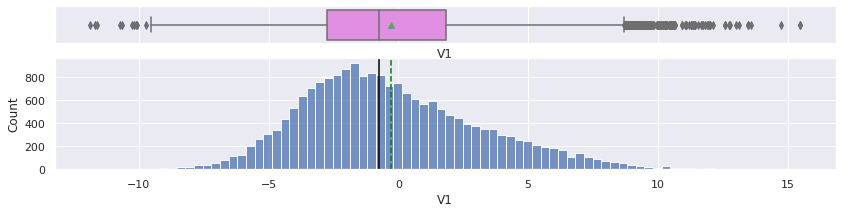

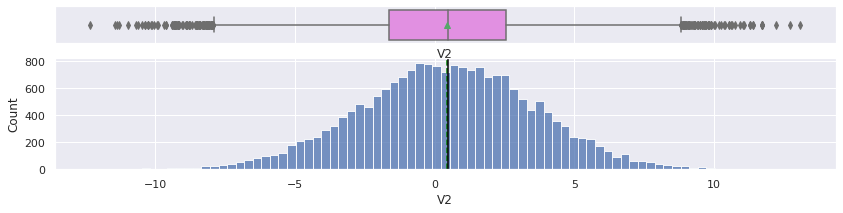

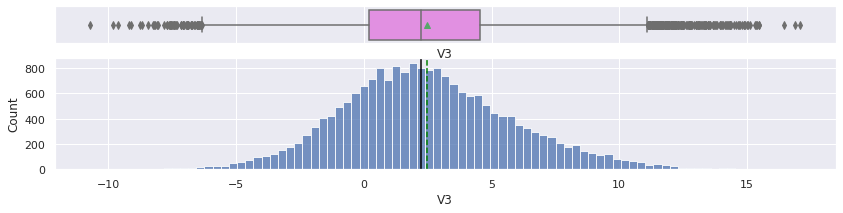

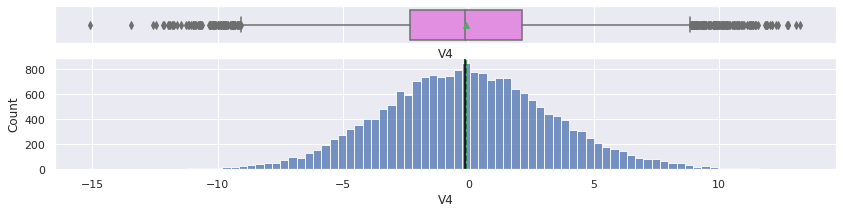

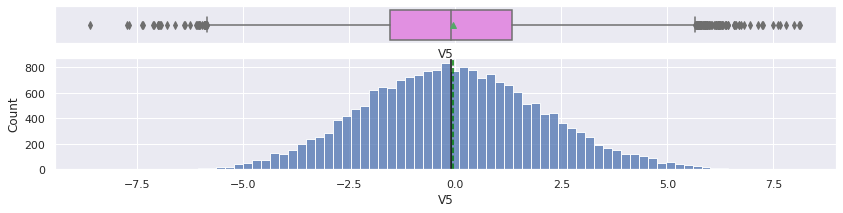

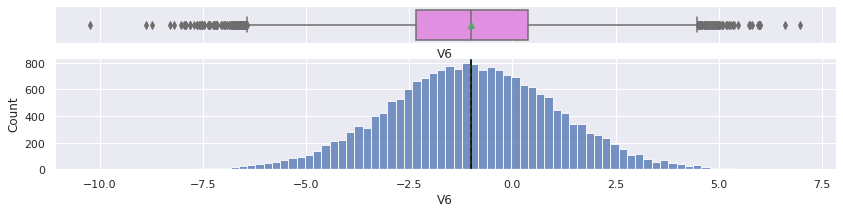

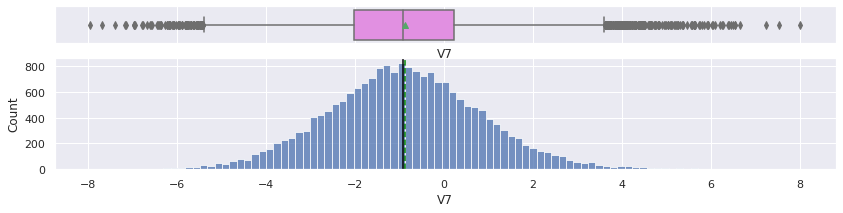

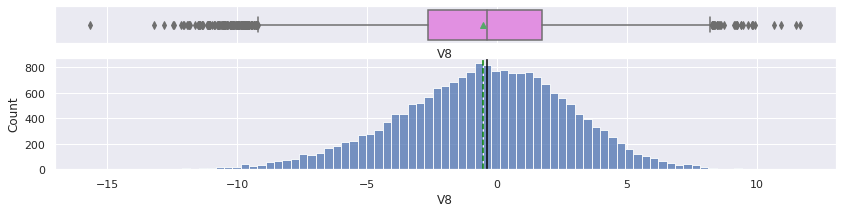

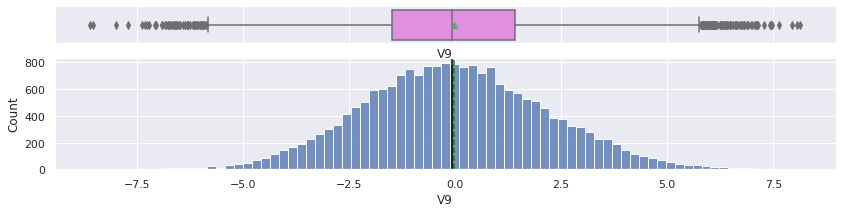

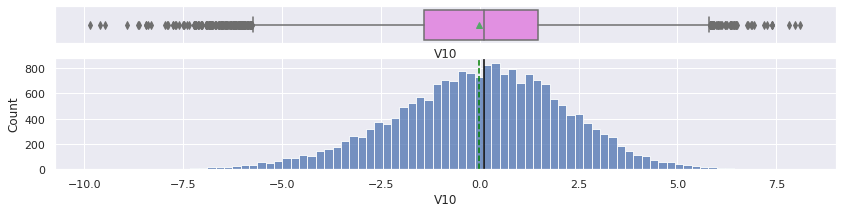

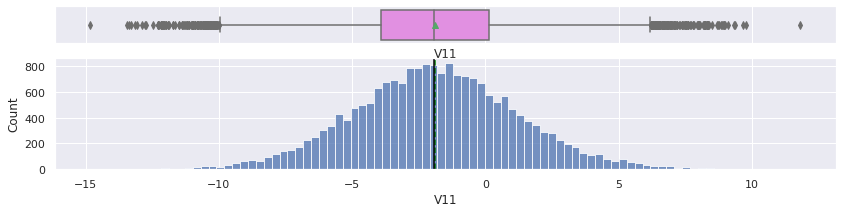

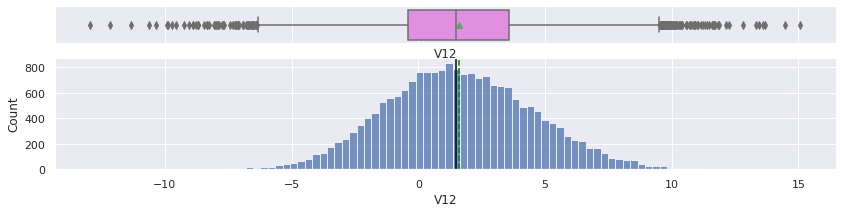

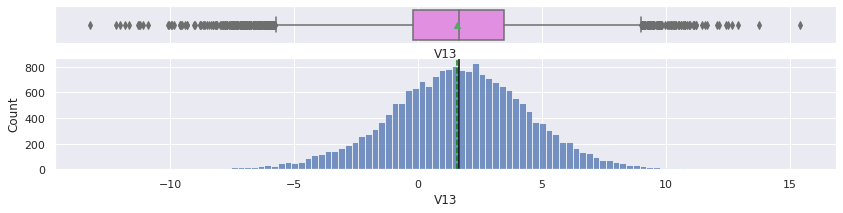

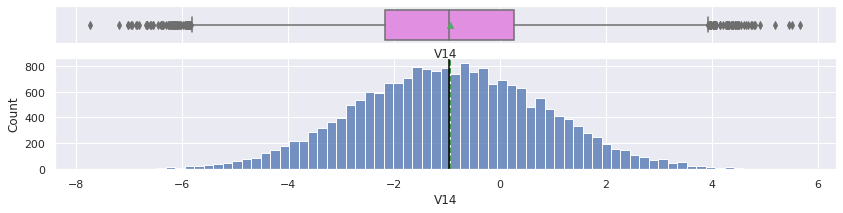

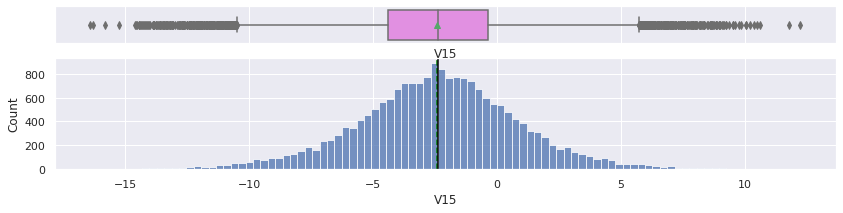

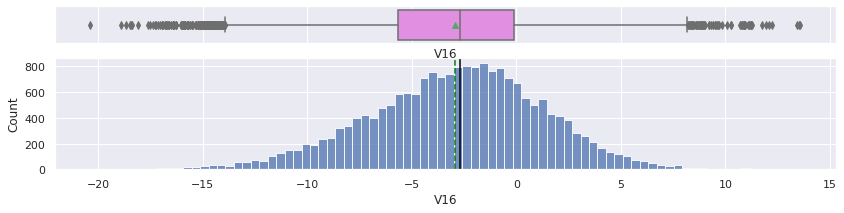

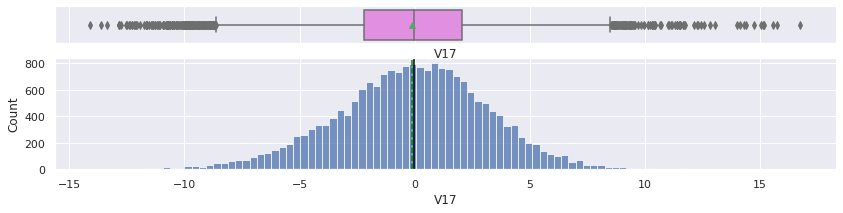

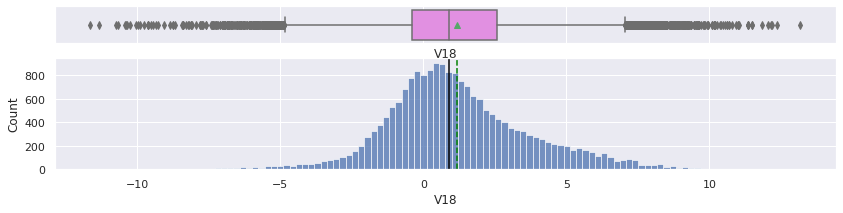

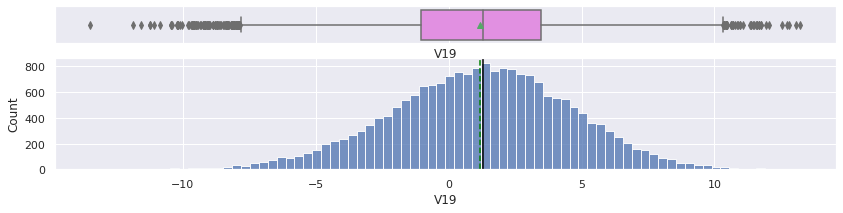

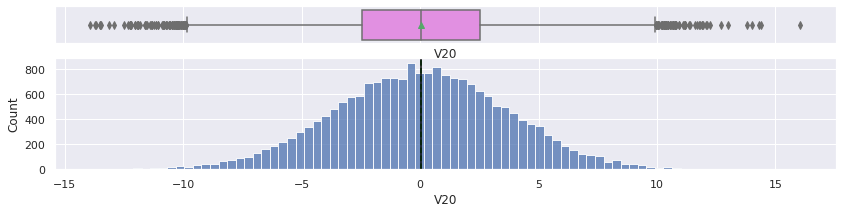

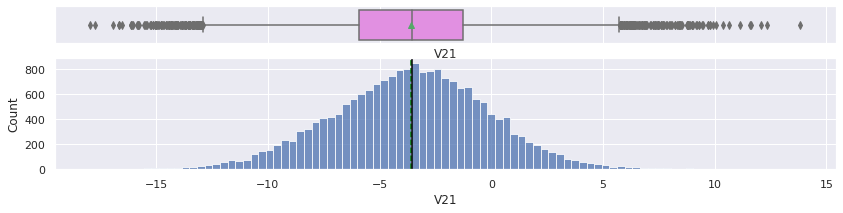

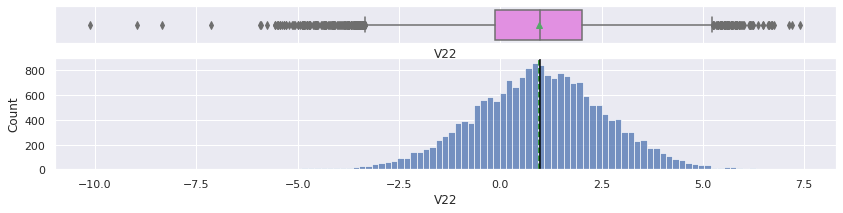

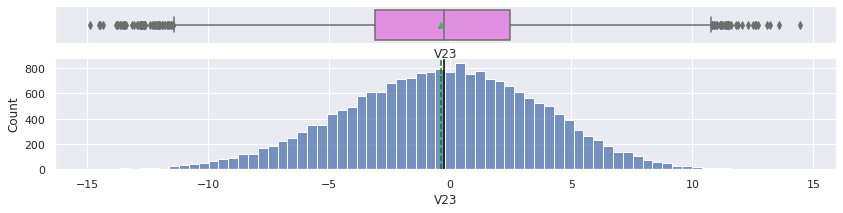

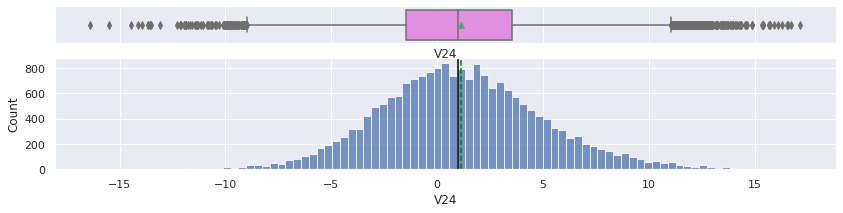

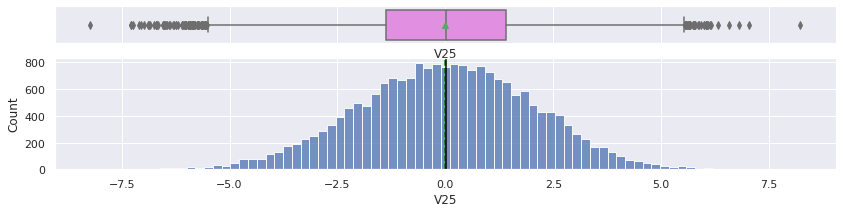

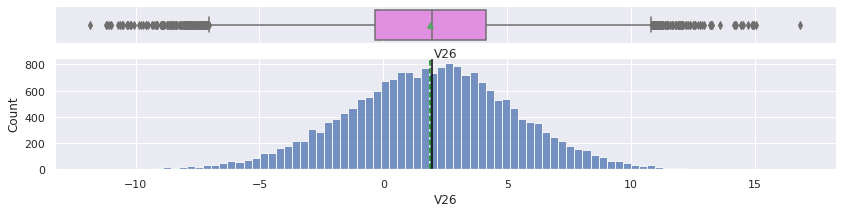

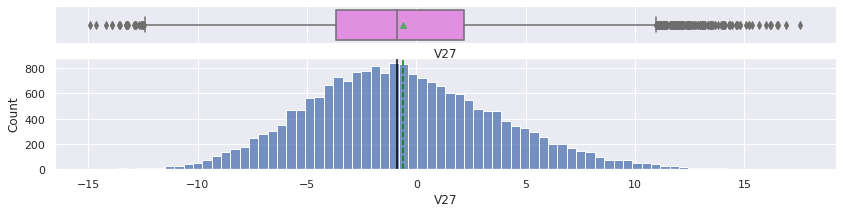

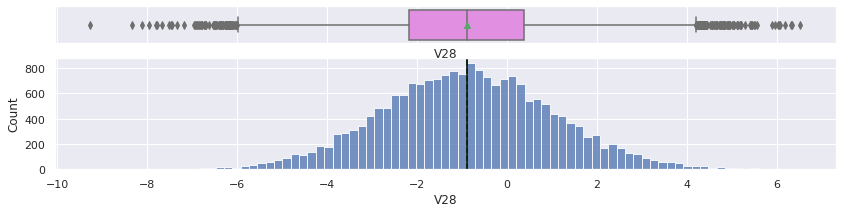

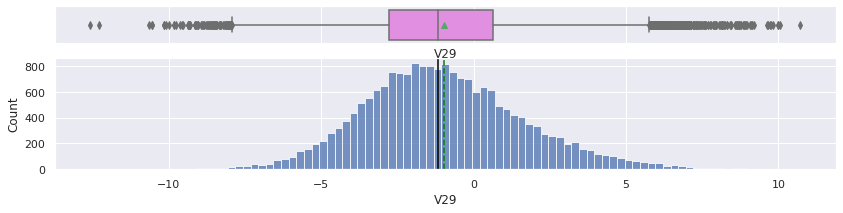

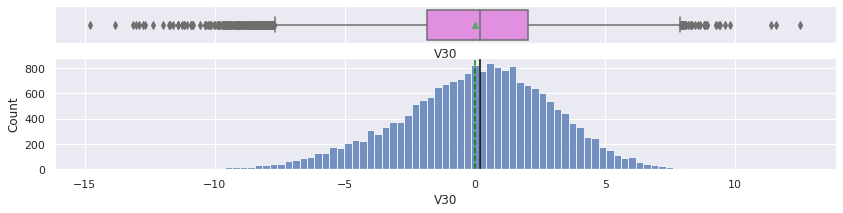

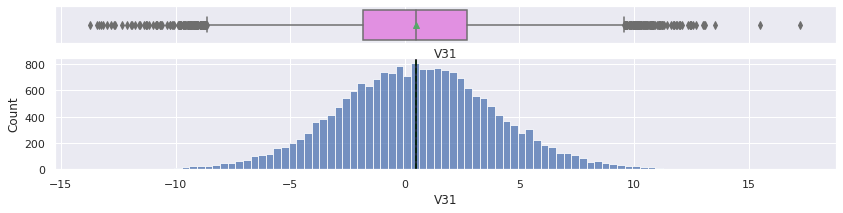

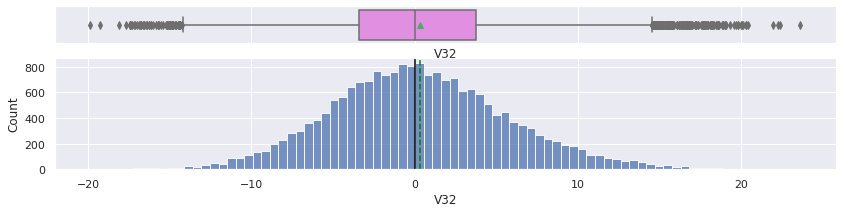

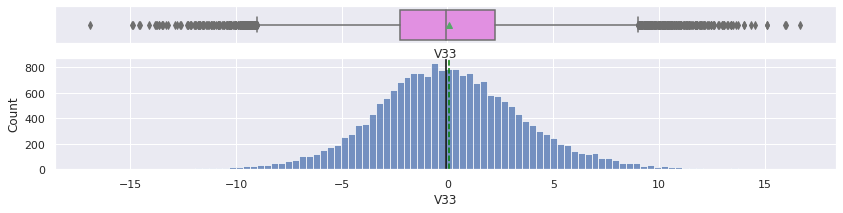

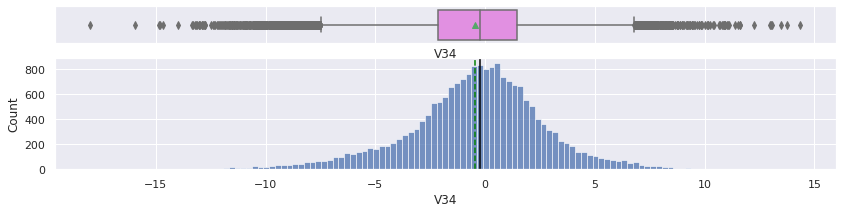

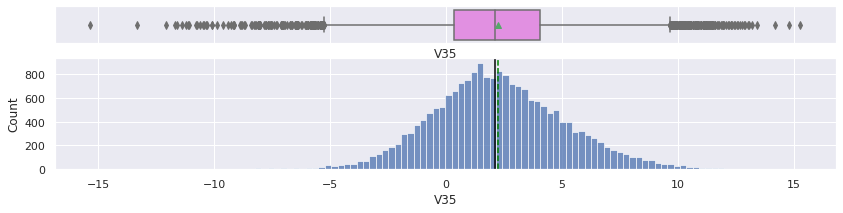

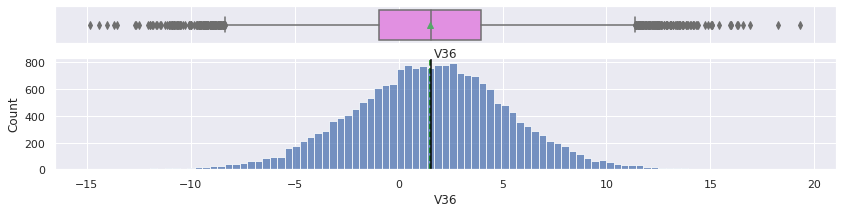

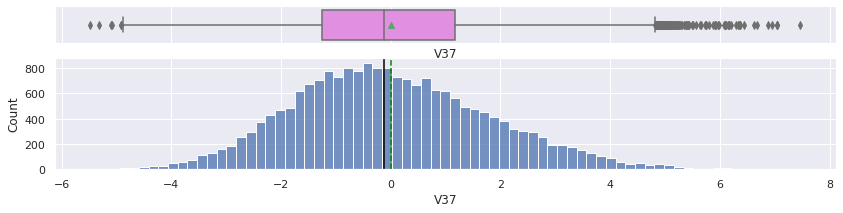

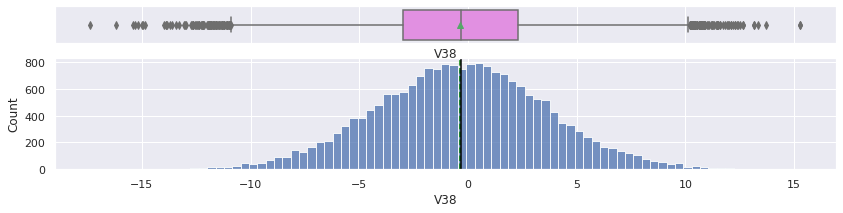

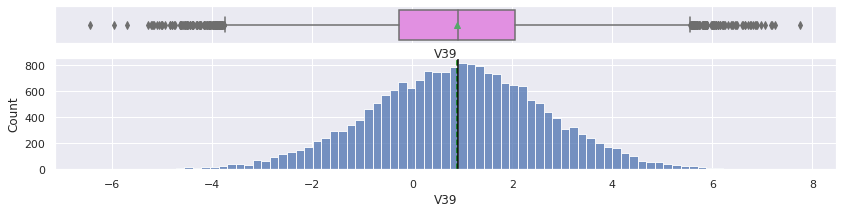

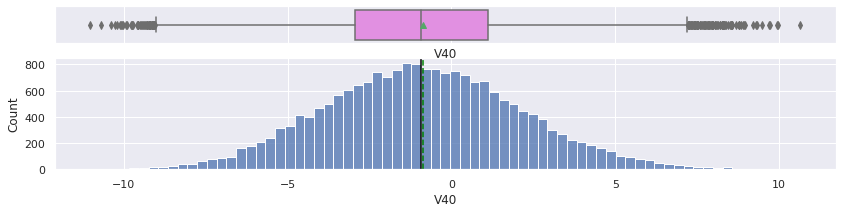

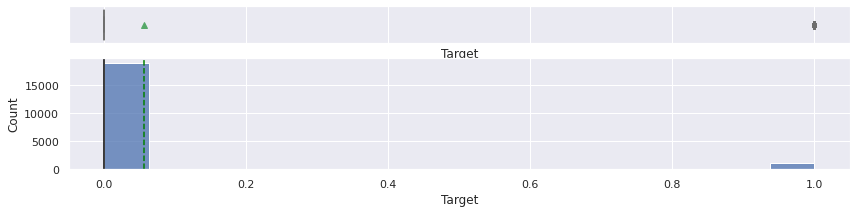

In [ ]:
#code to plot boxplots and histograms for all colunms in the Train dataset
for feature in dtrain.columns:
    histogram_boxplot(dtrain, feature, figsize=(14,3), kde=False, bins=None) 


**Like we observed in the statistical analysis above, the data for the V columns is all over the place and contains many outliers. Without direct context, we must assume these to be valid data points.**

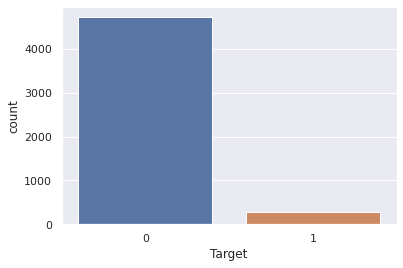

0    4718
1     282
Name: Target, dtype: int64

In [ ]:
#code to create a countplot for the Target column of the Test dataset
plt.figure(figsize=(6, 4))
sns.countplot(dtest["Target"])
plt.show()
dtest["Target"].value_counts()

**The Target data point in the Test data set indicates that we have 282 failures in the data set and 4718 non-failures. The data is heavily imbalanced as we might have expected given that a balanced rate of failure and non-failure would be borderline catastrophic.**

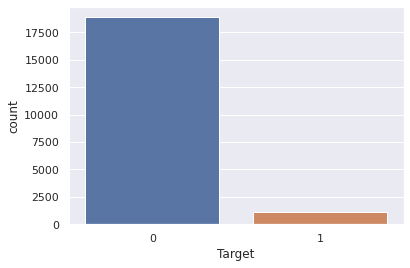

0    18890
1     1110
Name: Target, dtype: int64

In [ ]:
#Code to create a countplot for the Target column of the Train dataset
plt.figure(figsize=(6, 4))
sns.countplot(dtrain["Target"])
plt.show()
dtrain["Target"].value_counts()

**The Target data point in the Train data set indicates that the data set contains 1110 failures and 18890 non-failures.**

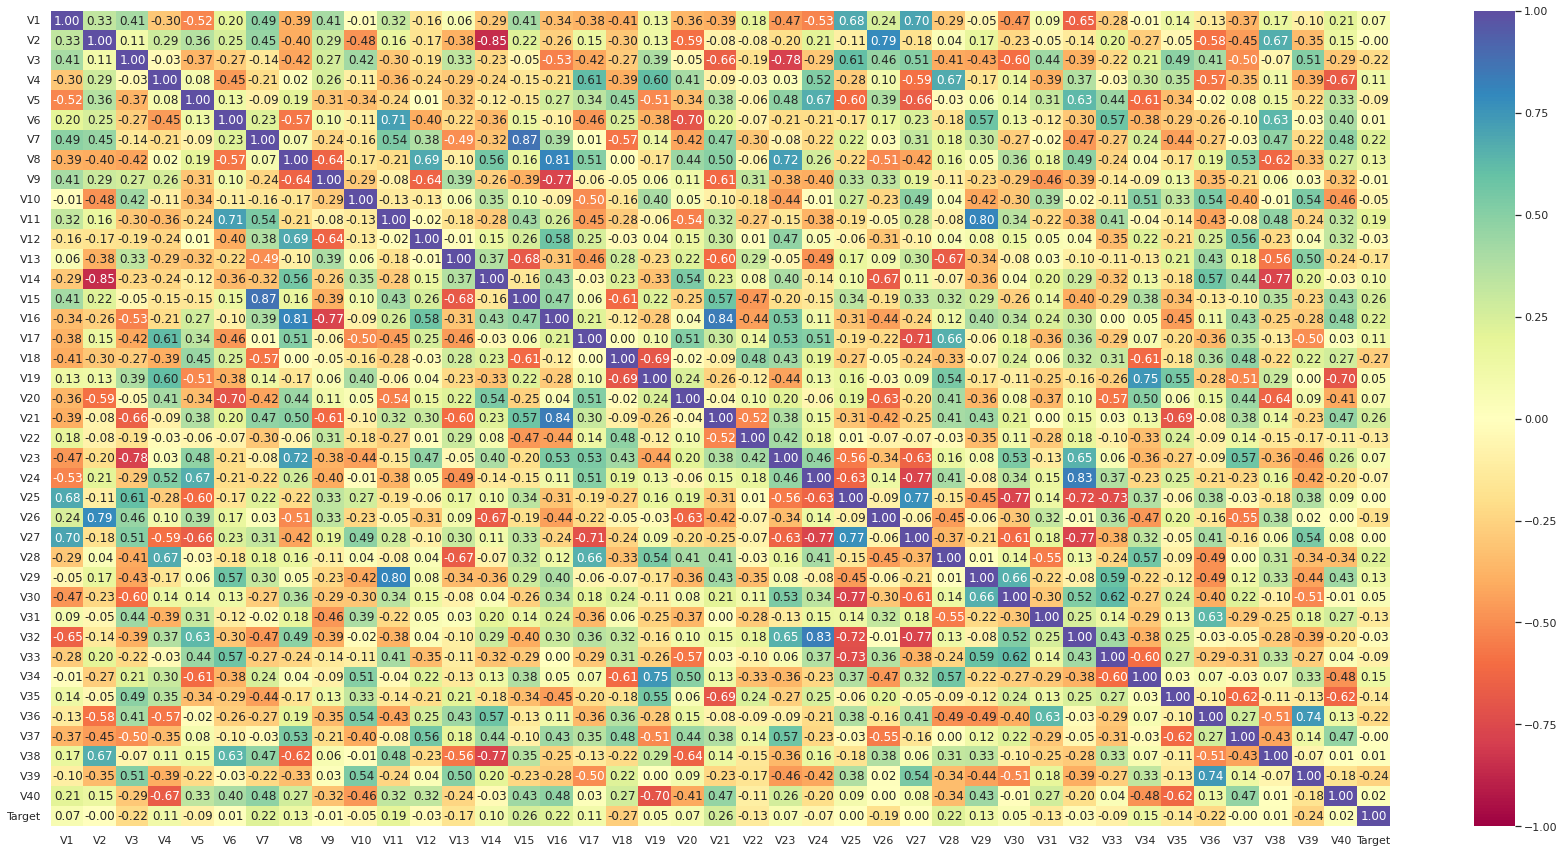

In [ ]:
#Code to plot a correlation heat map
cols_list = df_test.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 15))
sns.heatmap(
    df_test[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The Target variable has the strongest relationship with V15, V18, V21, and V39. We can explore these relationships in greater detail through bivariate anlyses.**

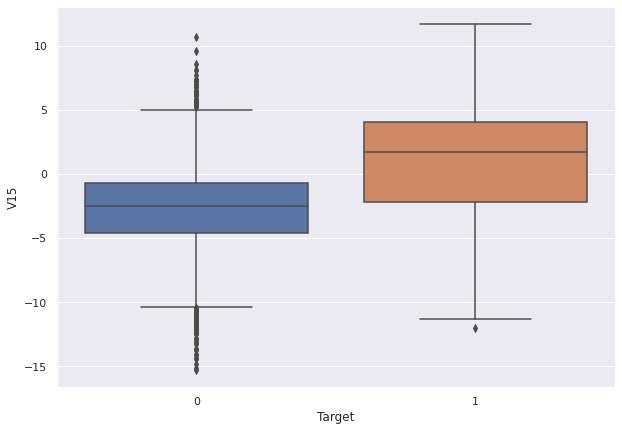

In [ ]:
#Code to Plot a box plot for the variable V15 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V15", data=df_test, orient="vertical")

**Generators in V15 have much higher rate of failure. The median of non-failres is neary even with the beginning of the lower quartile**

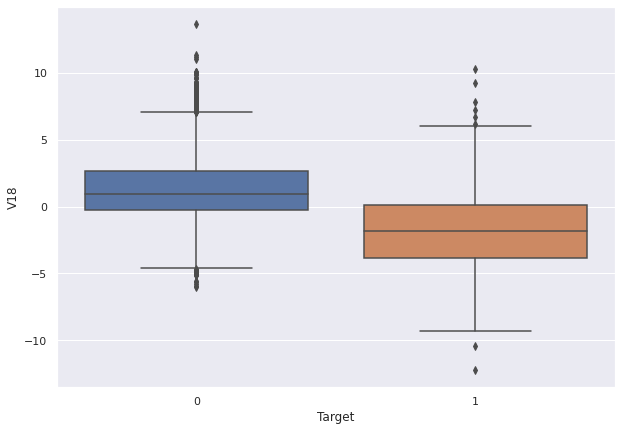

In [ ]:
#Code to Plot a box plot for the variable V18 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V18", data=df_test, orient="vertical")

**Here we see almost the complete opposite of the plot above. The generators in V18 are much less likely to produce failure than those in V15**

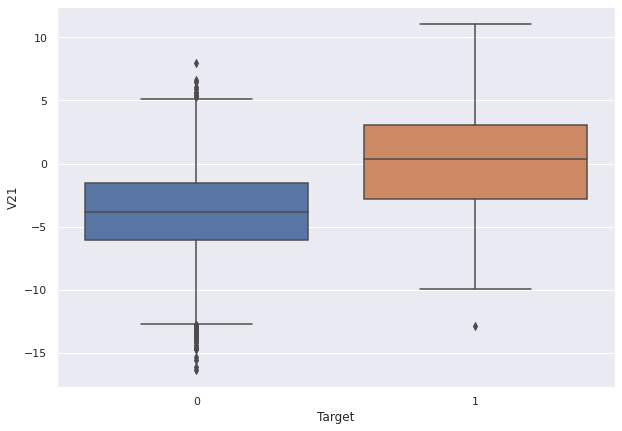

In [ ]:
#Code to plot a box plot for the variable V21 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V21", data=df_test, orient="vertical")

**V21 is another example more prone to failure. As you can see, the upper quartile line for failure here is almost even with the lower quartile line for non-failure.**

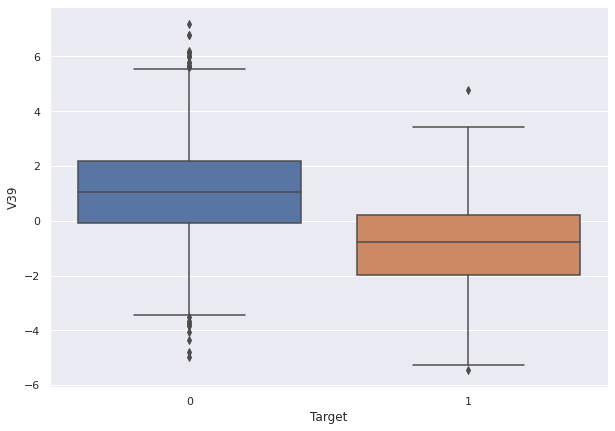

In [ ]:
#Code to plot a box plot for the variable V39 and target data
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Target", y="V39", data=df_test, orient="vertical")

**V39 shows a strong similarity to V18 in relation to the higher amount of non-failures in the group. Interestingly enough, there is a .22 relationship between V39 and V18 in the heat map but without further details and more depth in the data, it seems unlikely that we can deduce anything from this relationship.**

## Data Pre-processing

**Since the Test data set is already its own data set, we will only be splitting our Train data set into Train and a Validation set.**

In [ ]:
# Split Train data
dtr = dtrain.copy()

X = dtr.drop(["Target"], axis=1)
y = dtr["Target"]

In [ ]:
# Splitting data into training and validation sets:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape)

(14000, 40) (6000, 40)


**There are 14000 rows in the training set and 6000 rows in the validation set.**

In [ ]:
#code to check value count in the Training data
y_train.value_counts()

0    13223
1      777
Name: Target, dtype: int64

In [ ]:
#Code to check value counts in the Validation data
y_val.value_counts()

0    5667
1     333
Name: Target, dtype: int64

**By using Stratify, we ensure that the original distributions of failures to non-failures is maintained even after the data is split.**

In [ ]:
#Preparing the Test data set by dropping the "Target" variable
dte = dtest.copy()

X = dte.drop(["Target"], axis=1)
y = dte["Target"]

In [ ]:
#Removing the target variable from the test data set and making it the Y variable
X_test = dte.drop(['Target'], axis =1)
Y_test = dte['Target']

In [ ]:
#Confirming the test set has been split correctly
print('Test Set:', X_test.shape)

Test Set: (5000, 40)


**With the Target variable dropped from the Test set, we can confirm the shape and prepare to move on.**

## Missing value imputation




In [ ]:
#Imputing the median of the missing data values into the Training, Validation and Test datasets then printing it out in a table
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.fit_transform(X_val), columns=X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)

from tabulate import tabulate
table = [[(X_train.isna().sum()),(X_val.isna().sum()),(X_test.isna().sum()) ]]
       
print(tabulate(table, headers=["Train", "Validate", "Test"]))

Train         Validate      Test
------------  ------------  ------------
V1     0      V1     0      V1     0
V2     0      V2     0      V2     0
V3     0      V3     0      V3     0
V4     0      V4     0      V4     0
V5     0      V5     0      V5     0
V6     0      V6     0      V6     0
V7     0      V7     0      V7     0
V8     0      V8     0      V8     0
V9     0      V9     0      V9     0
V10    0      V10    0      V10    0
V11    0      V11    0      V11    0
V12    0      V12    0      V12    0
V13    0      V13    0      V13    0
V14    0      V14    0      V14    0
V15    0      V15    0      V15    0
V16    0      V16    0      V16    0
V17    0      V17    0      V17    0
V18    0      V18    0      V18    0
V19    0      V19    0      V19    0
V20    0      V20    0      V20    0
V21    0      V21    0      V21    0
V22    0      V22    0      V22    0
V23    0      V23    0      V23    0
V24    0      V24    0      V24    0
V25    0      V25    0      V25    0
V

**Since we are assuming that all of the data is valid, we will use the median to impute the missing values into the first two columns of the training and validation data sets. Then we run the same code from before to ensure that all missing values have been dealt with.**

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Below, we will define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

#code create confusion matrices
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "{}Cross-Validation performance on Training dataset:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "{}Validation Performance:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation performance on Training dataset:

Logistic Regression: 0.4902481389578163
dtree: 0.7078246484698097
Random forest: 0.7194127377998345
Bagging: 0.707808105872622
Adaboost: 0.6434656741108354
GBM: 0.7220016542597187
Xgboost: 0.7387262200165426

Validation Performance:

Logistic Regression: 0.5015015015015015
dtree: 0.7057057057057057
Random forest: 0.7357357357357357
Bagging: 0.7267267267267268
Adaboost: 0.6516516516516516
GBM: 0.7357357357357357
Xgboost: 0.7477477477477478


**Model performance is pretty similar between the Training and Validation sets. XGBoost, GBM, Random Forest, and Bagging perform the best on the original data. Nothing is obviously overfitting but performance could be better.**

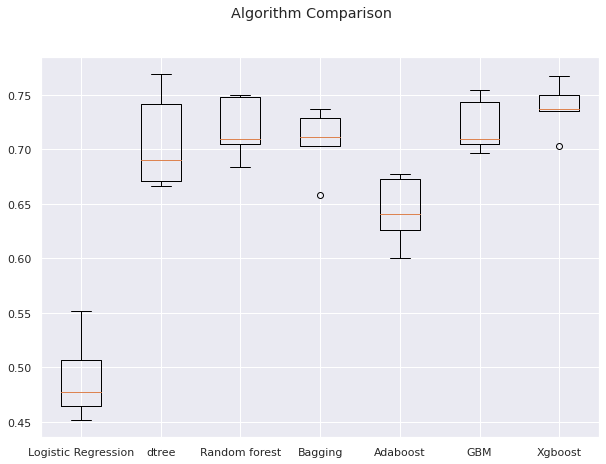

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**XGBoost is performing the best and has the least variance. Nothing seems to be overfitting. Logistic Regression's performance is a notable outlier for how bad it is.**

### Model Building with Oversampled data


In [ ]:
#Oversampling the data using SMOTE technique
#Checking the count of the target variables before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

#Checking the count of the target variables after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

#Checking the shape of the predictor and target variables after oversampling
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 777
Before OverSampling, counts of label '0': 13223 

After OverSampling, counts of label '1': 13223
After OverSampling, counts of label '0': 13223 

After OverSampling, the shape of train_X: (26446, 40)
After OverSampling, the shape of train_y: (26446,) 



**Oversampling has balanced the model bringing the number of 1's from 777 to 13,223**

In [ ]:
#Model building and cross validation on the oversampled data
models_over = []#Empty list to store new models

# Appending models into the list

models_over.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score

print("\n" "{}Cross-Validation Performance on Training Set:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print ("\n" "{}Validation Performance:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation Performance on Training Set:

Logistic Regression: 0.8917044404851445
dtree: 0.970128321355339
Random forest: 0.9829090368319754
Bagging: 0.975119441528989
Adaboost: 0.904787470436327
GBM: 0.9329201902370526
Xgboost: 0.9292145428962819

Validation Performance:

Logistic Regression: 0.8498498498498499
dtree: 0.7837837837837838
Random forest: 0.8558558558558559
Bagging: 0.8258258258258259
Adaboost: 0.8618618618618619
GBM: 0.8768768768768769
Xgboost: 0.8648648648648649


**The numbers indicate a high level of overfitting particualarly on the Training Set. GBM, XGBoost, Adaboost, and Random Forest performed best on the Validation set.**

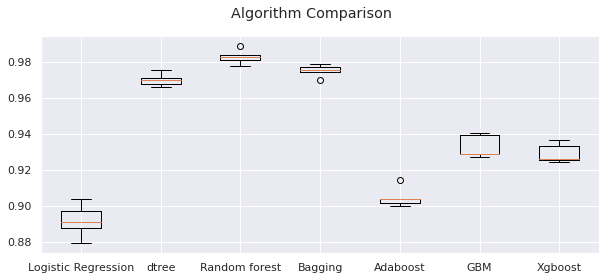

In [ ]:
# Plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(10, 4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names)

plt.show()

**Highest performance is in Random Forest, D-Tree, and Bagging though those are definitely overfitting. The smallest variance is in Bagging.**

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 777
Before UnderSampling, counts of label '0': 13223 

After UnderSampling, counts of label '1': 777
After UnderSampling, counts of label '0': 777 

After UnderSampling, the shape of train_X: (1554, 40)
After UnderSampling, the shape of train_y: (1554,) 



**Dramatic reduction in the number of 0's in the data from 13,223 to 777 which balances the data set. This means undersampling is functioning as predicted.**

In [ ]:
#Model building and cross validation on the undersampled data
models_un = []  # Empty list to store all the models

# Appending models into the list

models_un.append(("Logistic Regression", LogisticRegression(random_state=1)))
models_un.append(("dtree", DecisionTreeClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_un.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_un.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score

print("\n" "{}Cross-Validation Performance:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models_un:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "{}Validation Performance:{}" "\n".format('\033[1m', '\033[0m'))

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation Performance:

Logistic Regression: 0.8726220016542598
dtree: 0.8622167080231596
Random forest: 0.9034822167080232
Bagging: 0.880339123242349
Adaboost: 0.8725971877584782
GBM: 0.8932009925558313
Xgboost: 0.8957733664185277

Validation Performance:

Logistic Regression: 0.8468468468468469
dtree: 0.8408408408408409
Random forest: 0.8828828828828829
Bagging: 0.8708708708708709
Adaboost: 0.8588588588588588
GBM: 0.8828828828828829
Xgboost: 0.8888888888888888


**Undersampling has effectively eliminated the overfit issue present in the Oversampling models. Random Forest, XGBoost, and Bagging performed best but all model types performed well.**

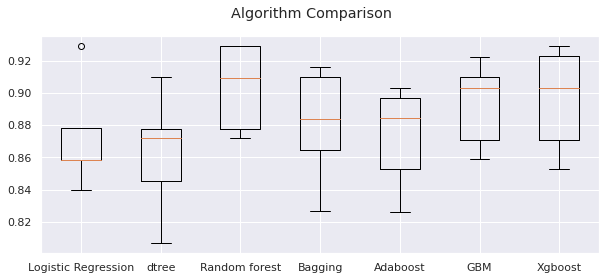

In [ ]:
# Plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(10, 4))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names)

plt.show()

**Random Forest and XGBoost perform the best. Logistic Regression performs the worst and has the biggest outlier.**

## HyperparameterTuning 





### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Models to be Hypertuned

**Below, we will be Hypertuning the following-**
* **Decision Tree Original, Oversample, and Undersample**
* **Adaboost Oversample**
* **GBM Oversample**
* **Random Forest Undersample**
* **Xgboost Undersample** 
* **GBM Undersample**




###  Decision Tree Hypertuning

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.550752688172043:


In [ ]:
# Set the clf to the best combination of parameters
dt1_tuned = DecisionTreeClassifier(
    min_samples_leaf=7,
    random_state=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=5,
)

# Fit the best algorithm to the data.
dt1_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
#Checking the performance on the training data
print("Training Set Performance")
dt_train_perf = model_performance_classification_sklearn(dt1_tuned, X_train, y_train)
dt_train_perf

Training Set Performance


,Accuracy,Recall,Precision,F1
0,0.974,0.624,0.877,0.729


In [ ]:
#Checking the performance on the validation set
print("Validation Set Performance")
dt_val_perf = model_performance_classification_sklearn(dt1_tuned, X_val, y_val) 
dt_val_perf

Validation Set Performance


,Accuracy,Recall,Precision,F1
0,0.971,0.634,0.799,0.707


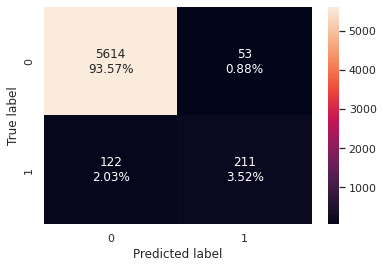

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dt1_tuned, X_val, y_val)

**Accuracy seems to be overfitting and Recall is not good. Also, it is only predicting 3.52% of failures while 2.03% of actual failures go undetected by the model which is not nearly good enough. This model seems an unlikely candidate to be our final model.**

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9240715362242579:


In [ ]:
# Set the clf to the best combination of parameters
dt2_tuned = DecisionTreeClassifier(
    min_samples_leaf=7,
    random_state=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=3,
)

# Fit the best algorithm to the data.
dt2_tuned.fit(X_train_over,y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
#Checking the performance on the validation set
dt2_val_perf = model_performance_classification_sklearn(dt2_tuned, X_val, y_val)
dt2_val_perf

,Accuracy,Recall,Precision,F1
0,0.754,0.877,0.169,0.284


In [ ]:
#Checking the performance on the training set
dt2_train_perf = model_performance_classification_sklearn(dt2_tuned, X_train_over, y_train_over)
dt2_train_perf

,Accuracy,Recall,Precision,F1
0,0.843,0.925,0.794,0.855


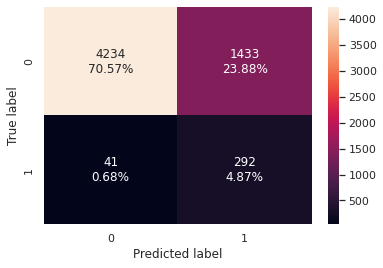

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(dt2_tuned, X_val, y_val)

**Recall on the Train set seems pretty strong here but there may be some overfitting given the differnce in the Validation scores. The numbers in the Confusion Matrix are better on actual failures at 4.87% but significantly worse on undetected failures at .68%**

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.83520264681555:


In [ ]:
# Set the clf to the best combination of parameters
dt3_tuned = DecisionTreeClassifier(
    min_samples_leaf=1,
    random_state=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=11,
)

# Fit the best algorithm to the data.
dt3_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
#Checking the performance on the training set
dt3_train_perf = model_performance_classification_sklearn(dt3_tuned, X_train_un, y_train_un)
dt3_train_perf

,Accuracy,Recall,Precision,F1
0,0.912,0.880,0.940,0.909


In [ ]:
#Checking the performance on the validation set
dt3_val_perf = model_performance_classification_sklearn(dt3_tuned, X_val, y_val)
dt3_val_perf

,Accuracy,Recall,Precision,F1
0,0.909,0.844,0.363,0.507


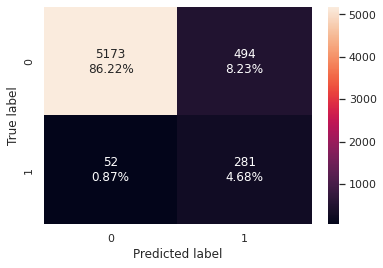

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(dt3_tuned, X_val, y_val)

**Recall performs well which is good but there is a strange dip in precision between the Train and Validation sets which does not seem relevant to the model at hand. Actual failures predicted is solid at 4.68% but the number of undetected failures is still under 1%.**

### AdaBoost Oversample Hypertuning

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], 
              "learning_rate": [0.2, 0.05], 
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                                 DecisionTreeClassifier(max_depth=2, random_state=1), 
                                 DecisionTreeClassifier(max_depth=3, random_state=1), ] 
              }
#scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5, 
    random_state=1
    )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data


print(
    "Best parameters are {} with CV score={}:" .format(
        randomized_cv.best_params_,randomized_cv.best_score_
        )
    )



Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9764048857633935:


In [ ]:
# Set the clf to the best combination of parameters
abt_tuned = AdaBoostClassifier(
   n_estimators= 200, 
   learning_rate= 0.2, 
   base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the best algorithm to the data.
abt_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [ ]:
#checking performance on the Training set
ada_train_perf = model_performance_classification_sklearn(abt_tuned, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.994,0.991,0.997,0.994


In [ ]:
#Checking performance on the Validation set
ada_val_perf = model_performance_classification_sklearn(abt_tuned, X_val, y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.980,0.847,0.803,0.825


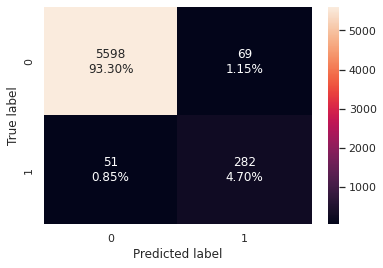

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(abt_tuned, X_val, y_val)

**Seeing some inconsistency between the Train and the Validation data. Percentage of correctly predicted failures and undetected failures are the same as the last model.**

###  GMB Oversample Hypertuning

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }
#scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5, 
    random_state=1
    )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data


print(
    "Best parameters are {} with CV score={}:" .format(
        randomized_cv.best_params_,randomized_cv.best_score_
        )
    )

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9711863505200633:


In [ ]:
# Set the clf to the best combination of parameters
gbm_tuned = GradientBoostingClassifier(
  subsample = 0.7, 
  n_estimators = 125, 
  max_features = 0.5, 
  learning_rate = 1)


# Fit the best algorithm to the data.
gbm_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
#Checking performance on the Training set
gbm_train_perf = model_performance_classification_sklearn(gbm_tuned, X_train_over, y_train_over)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.993,0.993,0.994,0.993


In [ ]:
#Checking the performance on the validation set
gbm_val_perf = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.961,0.823,0.606,0.698


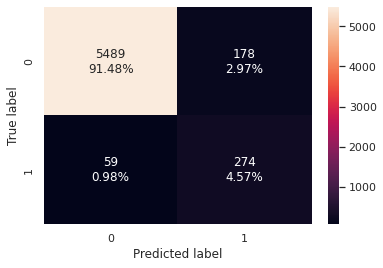

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(gbm_tuned, X_val, y_val)

**Another model where Precision takes a massive dip between Train and Validate. There is variation between Train and Validate on Recall but both numbers are high. This might be indicate slight overfitting. The percentage of correctly predicted failures is right in the same area as the last couple of models at 4.65% and the percentage of undetected is a little higher at .9% but still not where we would like to see it.**

### Random Forest Undersample Hypertuning

In [ ]:
# defining model

Model =  RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }
#scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5, 
    random_state=1
    )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on over sampled data


print(
    "Best parameters are {} with CV score={}:" .format(
        randomized_cv.best_params_,randomized_cv.best_score_
        )
    )


Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9047477253928868:


In [ ]:
# Set the clf to the best combination of parameters
rf_tuned = RandomForestClassifier(
  max_samples = 0.6,  
  min_samples_leaf = 1, 
  n_estimators = 300, 
  max_features = 'sqrt')


# Fit the best algorithm to the data.
rf_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300)

In [ ]:
#Checking the performance on the training set
rf_train_perf = model_performance_classification_sklearn(rf_tuned, X_train_un, y_train_un)
rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.977,0.999,0.988


In [ ]:
#Checking the performance on the validation set
rf_val_perf = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.934,0.880,0.451,0.596


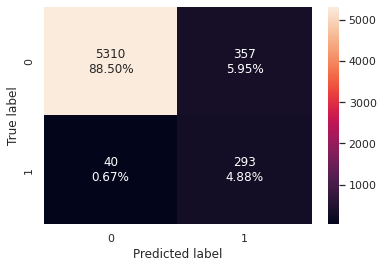

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

**Recall is great here but there is a bit of a strange drop off on Precision and F1. Very low score of .68% on failures that go undetected by the model.**

### Xgboost Undersample

In [ ]:
# defining model

Model =  XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 
            'scale_pos_weight': [5,10], 
            'learning_rate': [0.1,0.2], 
            'gamma': [0,3,5], 
            'subsample': [0.8,0.9] }
#scorer = metrics.make_scorer(metrics.recall_score)
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model, 
    param_distributions=param_grid, 
    n_iter=50, 
    n_jobs = -1, 
    scoring=scorer, 
    cv=5, 
    random_state=1
    )

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on over sampled data


print(
    "Best parameters are {} with CV score={}:" .format(
        randomized_cv.best_params_,randomized_cv.best_score_
        )
    )


Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9343589743589744:


In [ ]:
# Set the clf to the best combination of parameters
xgb_tuned = XGBClassifier(
  subsample = 0.9,
  scale_pos_weight = 10,
  n_estimators = 150,
  learning_rate = 0.1,
  gamma = 0)


# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(n_estimators=150, scale_pos_weight=10, subsample=0.9)

In [ ]:
#Checking the performance on the training set
xgb_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train_un, y_train_un)
xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.959,1.000,0.924,0.960


In [ ]:
#Checking the performance on the validation set
xgb_val_perf = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.797,0.919,0.204,0.334


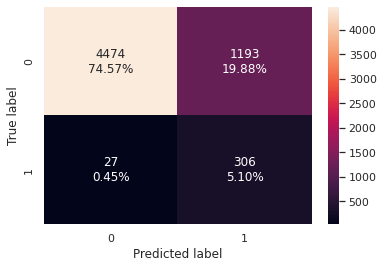

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

**Looks to be overfitting on the Recall and Accuracy scores in the Train data set. Also, highly inconsistent in Precision and F1. One of the lowest scores we have seen in terms of failures that go undetected (.45%) and not a great score for prediction of Failures either (5.10%).**

### GBM Undersample

In [ ]:
#Gradent boosting using undersampled data
# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.9047394540942928:


In [ ]:
gbm_under = GradientBoostingClassifier(
    max_features=0.7,
    random_state=1,
    learning_rate=0.2,
    n_estimators=100,
    subsample=0.7,
)
## fitting the model on under sampled data
gbm_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
#Checking the performance on the training set
gbm_train_under = model_performance_classification_sklearn(gbm_under, X_train_un, y_train_un) 
gbm_train_under

,Accuracy,Recall,Precision,F1
0,0.996,0.992,1.000,0.996


In [ ]:
#Checking the performance on the validation set
gbm_val_under = model_performance_classification_sklearn(gbm_under, X_val, y_val)
gbm_val_under

,Accuracy,Recall,Precision,F1
0,0.916,0.874,0.387,0.537


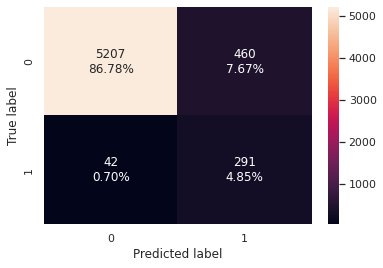

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(gbm_under, X_val, y_val)

**We see more of the extremem drop offs in Precision and F1 scores that we have observed on some of the other models. Recall is good and the scores in the matrix for failure detection (4.85%) and errors undetected by the model (.7%) while not outstanding, seem to be in line with many of our other models**

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_train_perf.T,
        dt2_train_perf.T,
        dt3_train_perf.T,
        ada_train_perf.T,
        gbm_train_perf.T,
        rf_train_perf.T,
        xgb_train_perf.T,
        gbm_train_under.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision tree tuned with Original Data",
    "Decision tree tuned with Oversampled Data",
    "Decision tree tuned with Undersampled Data",
    "AdaBoost classifier tuned with Oversampled Data",
    "Gradient Boosting tuned with Oversampled Data",
    "Random forest tuned with Undersampled Data",
    "XGBoost tuned with Undersampled Data",
    "Gradient Boosting tuned with Undersampled",
]
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dt_val_perf.T,
        dt2_val_perf.T,
        dt3_val_perf.T,
        ada_val_perf.T,
        gbm_val_perf.T,
        rf_val_perf.T,
        xgb_val_perf.T,
        gbm_val_under.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision tree tuned with Original data",
    "Decision tree tuned with Oversampled data",
    "Decision tree tuned with Undersampled data",
    "AdaBoost classifier tuned with Oversampled data",
    "Gradient Boosting tuned with Oversampled data",
    "Random forest tuned with Undersampled data",
    "XGBoost tuned with Undersampled data",
    "Gradient Boosting tuned with Undersampled data",
]
#trainging comparison printout
print("\n" "{}Training Performance Comparison:{}" "\n".format('\033[1m', '\033[0m'))
models_train_comp_df


Training Performance Comparison:



,Decision tree tuned with Original Data,Decision tree tuned with Oversampled Data,Decision tree tuned with Undersampled Data,AdaBoost classifier tuned with Oversampled Data,Gradient Boosting tuned with Oversampled Data,Random forest tuned with Undersampled Data,XGBoost tuned with Undersampled Data,Gradient Boosting tuned with Undersampled
Accuracy,0.974,0.843,0.912,0.994,0.993,0.988,0.959,0.996
Recall,0.624,0.925,0.880,0.991,0.993,0.977,1.000,0.992
Precision,0.877,0.794,0.940,0.997,0.994,0.999,0.924,1.000
F1,0.729,0.855,0.909,0.994,0.993,0.988,0.960,0.996


In [ ]:
#validation performance comparison printout
print("\n" "{}Validation Performance Comparison:{}" "\n".format('\033[1m', '\033[0m'))
models_val_comp_df


Validation Performance Comparison:



,Decision tree tuned with Original data,Decision tree tuned with Oversampled data,Decision tree tuned with Undersampled data,AdaBoost classifier tuned with Oversampled data,Gradient Boosting tuned with Oversampled data,Random forest tuned with Undersampled data,XGBoost tuned with Undersampled data,Gradient Boosting tuned with Undersampled data
Accuracy,0.971,0.754,0.909,0.980,0.961,0.934,0.797,0.916
Recall,0.634,0.877,0.844,0.847,0.823,0.880,0.919,0.874
Precision,0.799,0.169,0.363,0.803,0.606,0.451,0.204,0.387
F1,0.707,0.284,0.507,0.825,0.698,0.596,0.334,0.537


**From the above data, we can see that AdaBoost on the Oversampled Data performs the best consistently and we will use it to craft the final model While it dips a little from the Training data, the Recall score is consistent with the Validation Recall score without showing signs of overfit.**

### Test set final performance

In [ ]:
#Final test performance
ada_test_perf = model_performance_classification_sklearn(abt_tuned, X_test, Y_test)
ada_test_perf

,Accuracy,Recall,Precision,F1
0,0.976,0.830,0.765,0.796


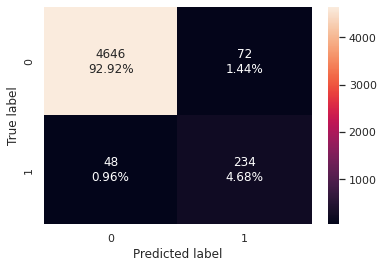

In [ ]:
#creating confusion matrix
confusion_matrix_sklearn(abt_tuned, X_test, Y_test)

**Testing shows a similar level of consistency as we saw on the Train and Validation data sets. While we might hope for better on the predicting actual failures (4.66%) but the model is still functioning very well compared to other we have looked at.**

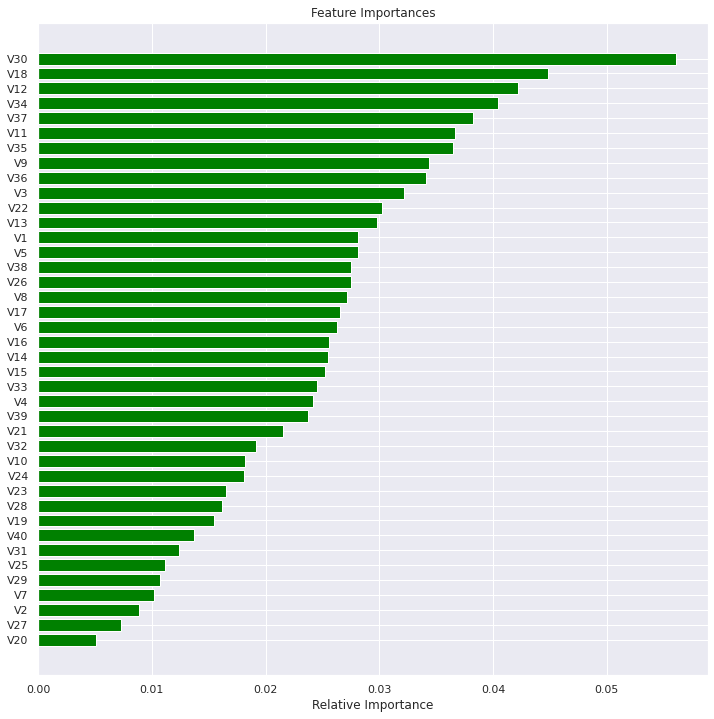

In [ ]:
#Checking important features
feature_names = X_train.columns
importances =  abt_tuned.feature_importances_ 
indices = np.argsort(importances)

#creating plot
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**V30, V18, V12, V34, and V37 were the most important features to our final model. Interstingly enough, the only one of those to show a close relationship in our Heat Map during Bivariate Analyses was V18.**

## Pipelines to build the final model


In [ ]:
# Pipeline to build the best model
Pipeline_model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),     
        (
            "Adaboost",
          AdaBoostClassifier(
            base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
            learning_rate=0.2,
            n_estimators = 200,
            random_state=1,
            ),
        ),
    ]
)


In [ ]:
#Making a final copy of the Test and Train data
dtrain_final = df.copy()
dtest_final = df_test.copy()

In [ ]:
#Separating Target variable from both data sets
X_trainF = dtrain_final.drop(columns="Target")
Y_trainF = dtrain_final["Target"]

X_testF = dtest_final.drop(columns="Target") 
y_testF = dtest_final["Target"]

In [ ]:
#treating the missing values by filling with the median
imputer = SimpleImputer(strategy="median")
X_trainF = imputer.fit_transform(X_trainF)

In [ ]:
# I will be using Oversampled data to ensure consistency with my chosen model
ros = SMOTE(random_state=1, sampling_strategy=1)
X_train_over, Y_train_over = ros.fit_resample(X_trainF, Y_trainF)

In [ ]:
# Fitting the pipeline model
Pipeline_model.fit(X_train_over, Y_train_over)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=200,
                                    random_state=1))])

In [ ]:
# Performance of the model using test data
Pipeline_model_test = model_performance_classification_sklearn(Pipeline_model, X_testF, y_testF)  
Pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.978,0.851,0.774,0.811


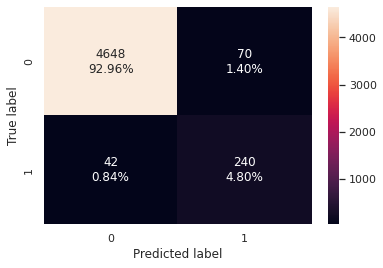

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn(Pipeline_model, X_testF, y_testF)

**These numbers remain consistent with what we saw during testing. The pipeline set up appears to have been successful!**

## Business Insights and Conclusions

**The AdaBoost performed very well on the SMOTE oversampled data. Not only was it able to generate a recall score around 85% on all models, it also performed well on all other measurables. Using the successfully constructed pipeline, ReneWind has a tool that can effectively predict failures in their product and reduce their overall operational costs accordingly. The Feature Importance graph of our model suggests that V30, V18, V12, and V34 were standouts in the weight they carried. These could bear further investigation. Any sort of data involving time, environment and overall length of output to failure would be helpful in further refining the model.**

In [ ]:
!jupyter nbconvert --to html /content/Fred_Hayes_MT_Project_LearnerNotebook_FullCode_Final.ipynb


[NbConvertApp] Converting notebook /content/Fred_Hayes_MT_Project_LearnerNotebook_FullCode_Final.ipynb to html
[NbConvertApp] Writing 2676554 bytes to /content/Fred_Hayes_MT_Project_LearnerNotebook_FullCode_Final.html
